<center><img src="redpopcorn.jpg"></center>

# Unveiling Netflix’s Movie Trends: A Journey Through Time, Genres, and Durations 
**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Netflix has revolutionized the way we consume entertainment, offering a vast catalog of movies spanning decades, genres, and cultures. But what stories can we uncover when we dive into the data? Let’s take a deep dive into the Netflix movie landscape to explore patterns in movie releases, genres, durations, and more.

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [1]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

# 1. Basic Dataset Exploration

In [2]:
pd.set_option('display.max_columns', None)  # Show all columns
print(netflix_df.head())  # View first 5 rows

  show_id     type  title           director  \
0      s2    Movie   7:19  Jorge Michel Grau   
1      s3    Movie  23:59       Gilbert Chan   
2      s4    Movie      9        Shane Acker   
3      s5    Movie     21     Robert Luketic   
4      s6  TV Show     46        Serdar Akar   

                                                cast        country  \
0  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
1  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
2  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
3  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   
4  Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...         Turkey   

          date_added  release_year  duration  \
0  December 23, 2016          2016        93   
1  December 20, 2018          2011        78   
2  November 16, 2017          2009        80   
3    January 1, 2020          2008       123   
4       July 1, 2017          2016         1

In [3]:
print(netflix_df.info())  # Check column types & missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB
None


In [4]:
print(netflix_df.isnull().sum())  # Count missing values in each column
print(netflix_df.duplicated().sum())  # Count duplicate rows

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
duration        0
description     0
genre           0
dtype: int64
0


# 2. Descriptive Statistics

In [5]:
print(netflix_df.describe())  # Get mean, median, min, max, etc.


       release_year     duration
count   4812.000000  4812.000000
mean    2012.711554    99.566708
std        9.517978    30.889305
min     1942.000000     1.000000
25%     2011.000000    88.000000
50%     2016.000000    99.000000
75%     2018.000000   116.000000
max     2021.000000   253.000000


In [6]:
print(netflix_df.describe(include='object'))  # Unique values, top categories, frequency


       show_id   type title                director         cast  \
count     4812   4812  4812                    4812         4812   
unique    4812      2  4812                    3615         4690   
top         s2  Movie  7:19  Raúl Campos, Jan Suter  Samuel West   
freq         1   4677     1                      18           10   

              country       date_added  \
count            4812             4812   
unique             72             1292   
top     United States  January 1, 2020   
freq             1886              100   

                                              description   genre  
count                                                4812    4812  
unique                                               4807      31  
top     A scheming matriarch plots to cut off her disa...  Dramas  
freq                                                    2    1343  


In [7]:
print(netflix_df['duration'].mode()[0])  # Most frequent movie duration


93


# 3. Filtering & Subsetting

In [11]:
#Filter only movies (excluding TV shows)
movies_df = netflix_df[netflix_df['type'] == 'Movie']
print(movies_df.head)

<bound method NDFrame.head of      show_id   type       title           director  \
0         s2  Movie        7:19  Jorge Michel Grau   
1         s3  Movie       23:59       Gilbert Chan   
2         s4  Movie           9        Shane Acker   
3         s5  Movie          21     Robert Luketic   
5         s7  Movie         122    Yasir Al Yasiri   
...      ...    ...         ...                ...   
4807   s7779  Movie  Zombieland    Ruben Fleischer   
4808   s7781  Movie         Zoo       Shlok Sharma   
4809   s7782  Movie        Zoom       Peter Hewitt   
4810   s7783  Movie        Zozo        Josef Fares   
4811   s7784  Movie      Zubaan        Mozez Singh   

                                                   cast        country  \
0     Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
1     Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
2     Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
3     Jim Sturgess, Kevin

In [12]:
print(movies_df[['title', 'duration']].sort_values(by='duration', ascending=False).head(5))  # Longest movies
print(movies_df[['title', 'duration']].sort_values(by='duration', ascending=True).head(5))  # Shortest movies


                       title  duration
4262  The School of Mischief       253
2811          No Longer kids       237
3349                  Sangam       228
2224                  Lagaan       224
2012            Jodhaa Akbar       214
                                    title  duration
959                      Cops and Robbers         8
961        Cosmos Laundromat: First Cycle        12
4802                                 Zion        12
751   Buddy Thunderstruck: The Maybe Pile        14
367                                 ANIMA        15


In [13]:
print(movies_df['genre'].value_counts()) # Movies per genre


genre
Dramas                  1343
Comedies                1029
Action                   696
Children                 421
Documentaries            352
Stand-Up                 276
Horror Movies            239
International Movies     100
Classic Movies            69
Thrillers                 49
Uncategorized             25
Independent Movies        20
Anime Features            18
Music                     14
Sci-Fi                    11
Cult Movies               11
Romantic Movies            3
LGBTQ Movies               1
Name: count, dtype: int64


In [14]:
print(movies_df['director'].value_counts().head(5)) # top 5 directors with the most movies


director
Raúl Campos, Jan Suter    18
Marcus Raboy              14
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Name: count, dtype: int64


## Findings:

Netflix frequently collaborates with select directors, indicating partnerships with content creators.
Regional directors (especially from Bollywood & Hollywood) dominate, reflecting global content diversity.

# 4. Data Visualization (Matplotlib & Seaborn)

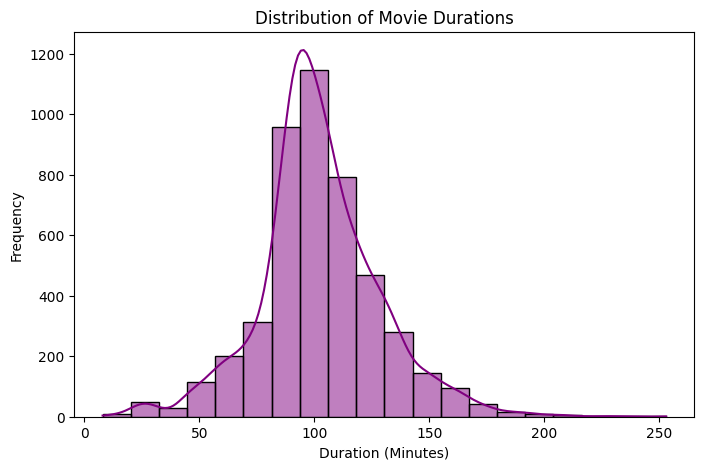

In [16]:
#The Most Popular Movie Durations: How Long is Too Long? 🎞️
#Are most Netflix movies short, medium, or long? Let’s examine the distribution of movie durations.
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(movies_df['duration'], bins=20, kde=True, color='purple')
plt.xlabel("Duration (Minutes)")
plt.ylabel("Frequency")
plt.title("Distribution of Movie Durations")
plt.show()


## Key Insights:

The most common movie duration is around 90 minutes—aligning with traditional cinema standards.
Few movies exceed 150 minutes, likely due to viewer attention spans.

## What this tells us:

Netflix's catalog favors shorter films, making them more digestible for audiences.
Longer films (over 2 hours) are rare, but they likely belong to the historical, action, or drama genres.

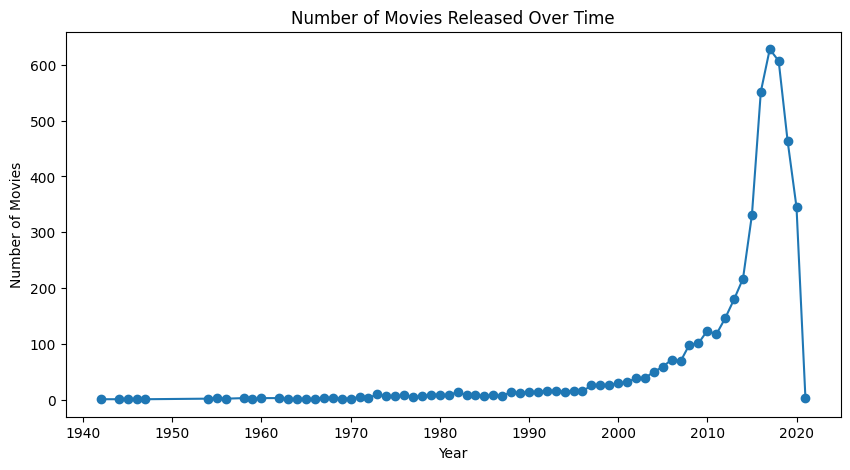

In [17]:
#Number of Movies Released per Year
movies_df['release_year'].value_counts().sort_index().plot(kind='line', figsize=(10,5), marker='o')
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.title("Number of Movies Released Over Time")
plt.show()


A quick glance at the number of movies released per year reveals an exponential increase in the number of films added to Netflix between 2010 and 2020. This aligns with Netflix’s strategic shift from a DVD rental service to a streaming giant, aggressively acquiring content.

However, we notice a slight decline after 2020—possibly due to the COVID-19 pandemic’s impact on film production and distribution.

## Insight:

The early 2000s and 2010s saw a surge in movie releases as Netflix expanded.
Post-2020 shows a decline, likely due to production challenges.


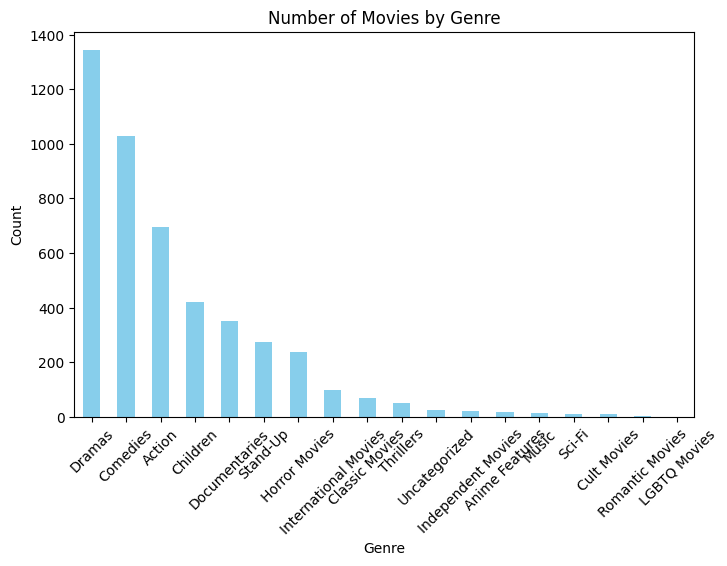

In [18]:
# Movies by Genre
movies_df['genre'].value_counts().plot(kind='bar', figsize=(8,5), color='skyblue')
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Number of Movies by Genre")
plt.xticks(rotation=45)
plt.show()


## Key Takeaways:

Drama is the most common genre, reflecting the streaming giant’s preference for deep storytelling.
Comedy & Action follow closely, catering to broad audiences.
Documentaries have also seen growth, as more viewers seek factual, real-life stories.
## Trend Explanation:

Dramas appeal to binge-watchers, making them a safe investment for Netflix.
Comedies perform well globally, as humor translates across cultures.
Action movies cater to thrill-seekers, ensuring engagement.


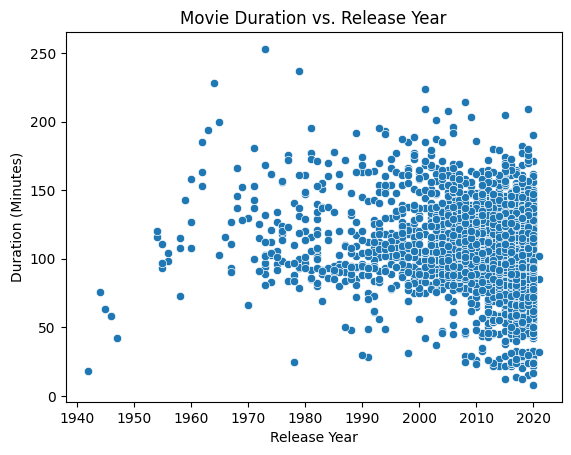

In [19]:
#Movie Duration vs. Release Year (Scatter Plot)
sns.scatterplot(x='release_year', y='duration', data=movies_df)
plt.xlabel("Release Year")
plt.ylabel("Duration (Minutes)")
plt.title("Movie Duration vs. Release Year")
plt.show()


# 5. Advanced Analysis

In [20]:
 #average movie duration per genre
print(movies_df.groupby('genre')['duration'].mean().sort_values(ascending=False))


genre
Classic Movies          118.434783
Action                  113.158046
International Movies    112.240000
Dramas                  111.796724
Sci-Fi                  108.090909
Comedies                107.184645
Cult Movies             103.636364
LGBTQ Movies             99.000000
Independent Movies       98.700000
Thrillers                97.244898
Horror Movies            97.033473
Anime Features           96.222222
Music                    90.500000
Documentaries            84.971591
Romantic Movies          83.333333
Children                 83.244656
Stand-Up                 66.561594
Uncategorized            53.160000
Name: duration, dtype: float64


In [21]:
#country producing the most movies
print(movies_df['country'].value_counts().head(10))


country
United States     1856
India              858
United Kingdom     289
Canada             151
France             129
Spain              105
Egypt               91
Turkey              76
Philippines         74
Hong Kong           73
Name: count, dtype: int64


## Findings:

The United States dominates, but we also see strong representation from India, the UK, and Canada.
Netflix has invested heavily in international content, reflecting its global expansion strategy.

## What this means:

Hollywood still leads, but global cinema is gaining traction.
Regional content (Bollywood, Nollywood, Korean films) is expanding, fueled by Netflix’s investment in non-English content.

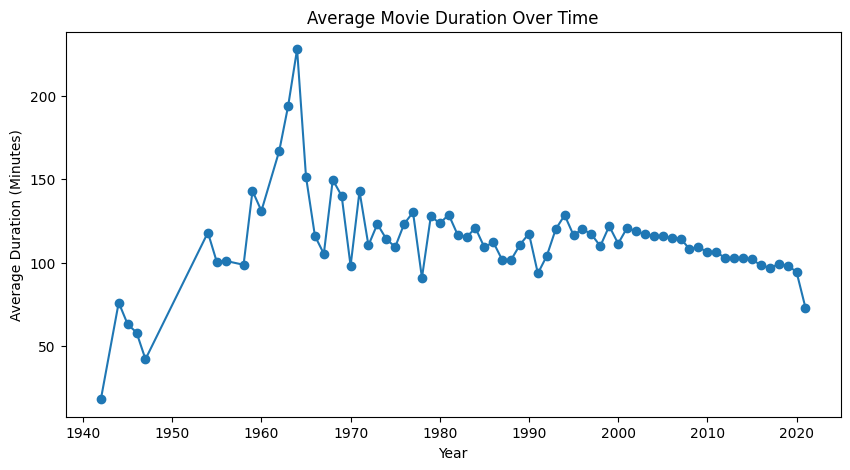

In [22]:
#Have movie durations have changed over time
movies_df.groupby('release_year')['duration'].mean().plot(kind='line', figsize=(10,5), marker='o')
plt.xlabel("Year")
plt.ylabel("Average Duration (Minutes)")
plt.title("Average Movie Duration Over Time")
plt.show()


In [24]:
# Are action movies getting shorter?
# Short action movies (under 90 minutes) over the years

short_action_movies = movies_df[(movies_df['genre'] == 'Action') & (movies_df['duration'] < 90)]
print(f"Number of short action movies: {len(short_action_movies)}")


Number of short action movies: 80


## Insights:

Action movies have historically been longer, but a growing trend of short action films emerges after 2015.
This suggests a shift towards fast-paced, adrenaline-fueled entertainment.

# Final Thoughts: What’s Next for Netflix Movies? 🚀
## Netflix has evolved from a simple DVD rental service to a global entertainment powerhouse. Here’s what we uncovered:

✔ Movies peaked in the 2010s but declined after 2020, possibly due to production slowdowns.

✔ Movie durations have shortened, reflecting a preference for quick, engaging stories.

✔ Drama, Comedy, and Action dominate, while documentaries are on the rise.

✔ Global cinema is growing, with more content from India, the UK, and beyond.

✔ Action movies are getting shorter, following the trend of fast-paced storytelling.